# **Image Contouring**

Download images for this notebook [here](https://github.com/tim3in/image-processing/tree/main/images/image_contouring).

# **Include Libraries**

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# **What is Image Contouring**

Image contouring is a fundamental technique in the field of image processing and computer vision. It involves detecting and representing the boundaries or outlines of objects within an image.

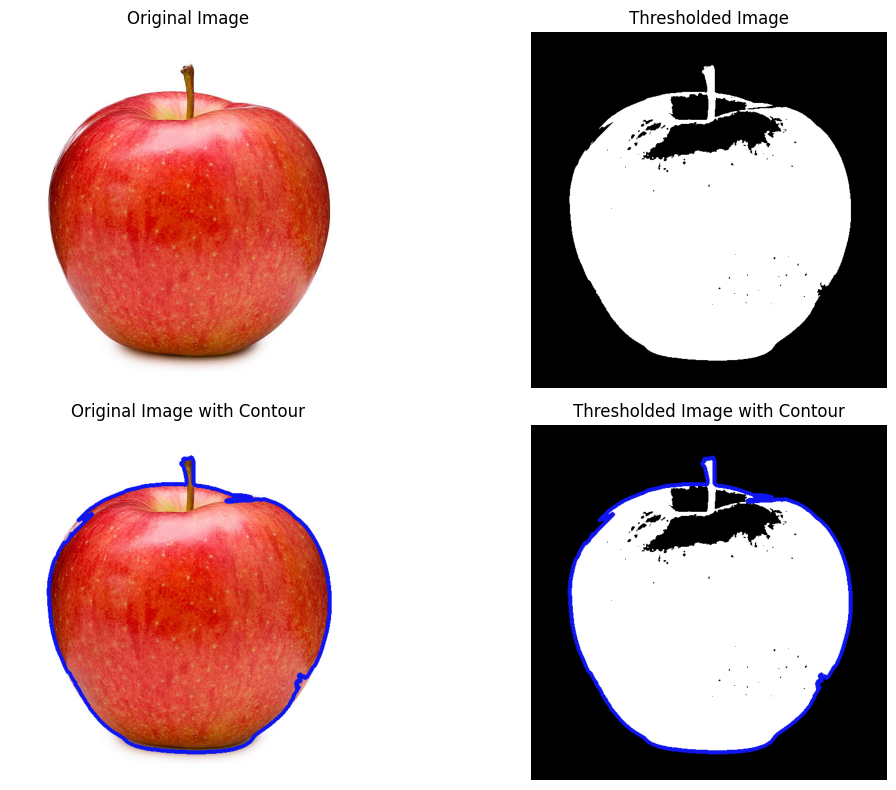

In [ ]:
# Read the image using imread()
image = cv2.imread("apple.jpg")

# Convert the image from BGR to RGB for displaying with matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply binary thresholding
# The threshold value (150) may need adjustment based on your image's lighting and contrast
ret, thresh = cv2.threshold(blurred, 150, 255, cv2.THRESH_BINARY_INV)

# Find contours in the thresholded image
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Assume the largest contour corresponds to the apple
largest_contour = max(contours, key=cv2.contourArea)

# Create copies of the original and thresholded images for drawing contours
image_with_contour = image_rgb.copy()
thresh_with_contour = cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB)

# Draw the largest contour on both images
cv2.drawContours(image_with_contour, [largest_contour], -1, (14, 21, 239), 5)      # Blue contour on original
cv2.drawContours(thresh_with_contour, [largest_contour], -1, (14, 21, 239), 5)    # Blue contour on thresholded

# Display all images using matplotlib
plt.figure(figsize=(12, 8))

# Original Image
plt.subplot(2, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

# Thresholded Image
plt.subplot(2, 2, 2)
plt.imshow(thresh, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')

# Contour on Original Image
plt.subplot(2, 2, 3)
plt.imshow(image_with_contour)
plt.title('Original Image with Contour')
plt.axis('off')

# Contour on Thresholded Image
plt.subplot(2, 2, 4)
plt.imshow(thresh_with_contour)
plt.title('Thresholded Image with Contour')
plt.axis('off')

plt.tight_layout()
plt.show()

## **How Image Contouring Works**
A Simple Contour Example.

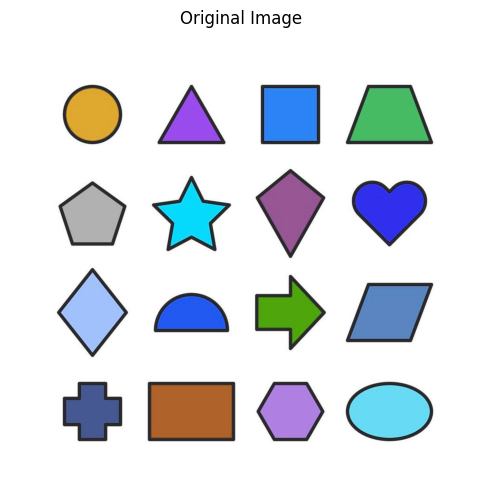

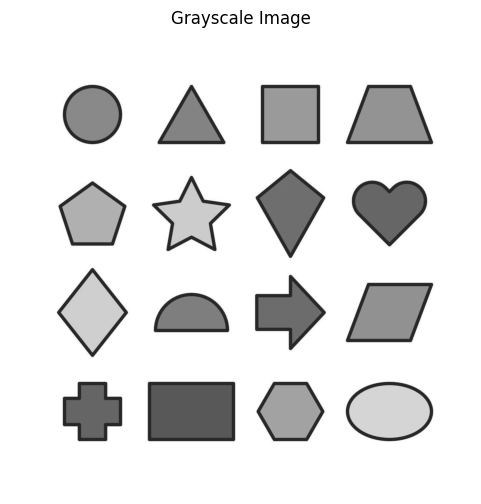

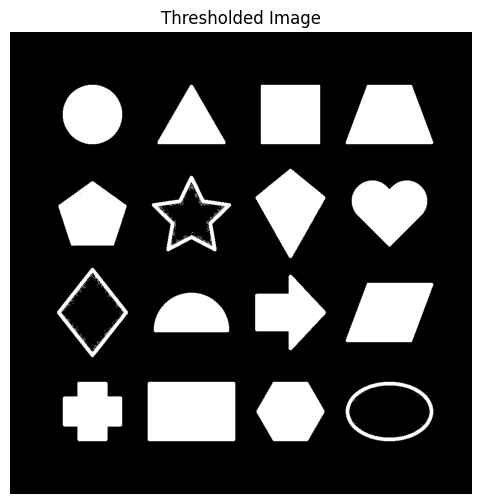

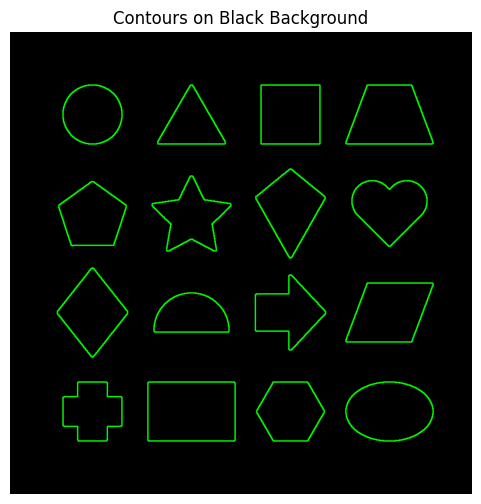

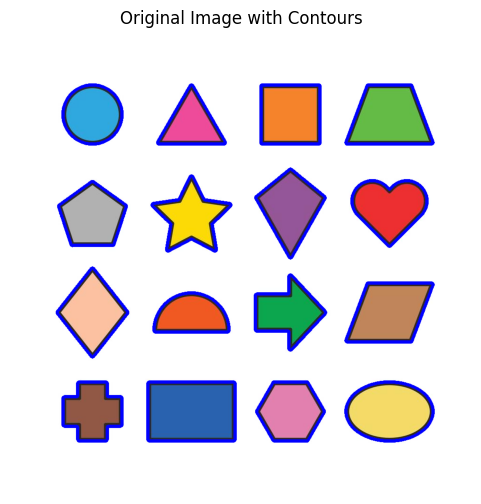

In [ ]:
# Read the image
image = cv2.imread('shapes.jpg')

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to create a binary image
_, binary = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV)

# Find contours in the binary image
contours, hierarchy = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create copies of the original image to draw contours
contour_image = image.copy()
contour_on_original = image.copy()

# Draw the contours on the binary (black) image
contour_black = np.zeros_like(image)
cv2.drawContours(contour_black, contours, -1, (0, 255, 0), 2)

# Draw the contours on the original image
cv2.drawContours(contour_on_original, contours, -1, (255,0, 0), 5)

# Convert images from BGR to RGB for visualization with matplotlib
contour_black_rgb = cv2.cvtColor(contour_black, cv2.COLOR_BGR2RGB)
contour_on_original_rgb = cv2.cvtColor(contour_on_original, cv2.COLOR_BGR2RGB)
original_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the original image
plt.figure(figsize=(6, 6))
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

# Display the grayscale image
plt.figure(figsize=(6, 6))
plt.imshow(gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

# Display the thresholded image
plt.figure(figsize=(6, 6))
plt.imshow(binary, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')
plt.show()

# Display the contour on a black background
plt.figure(figsize=(6, 6))
plt.imshow(contour_black_rgb)
plt.title('Contours on Black Background')
plt.axis('off')
plt.show()

# Display the original image with contours
plt.figure(figsize=(6, 6))
plt.imshow(contour_on_original_rgb)
plt.title('Original Image with Contours')
plt.axis('off')
plt.show()

## **Contour Retrieval Mode**

### Input Image

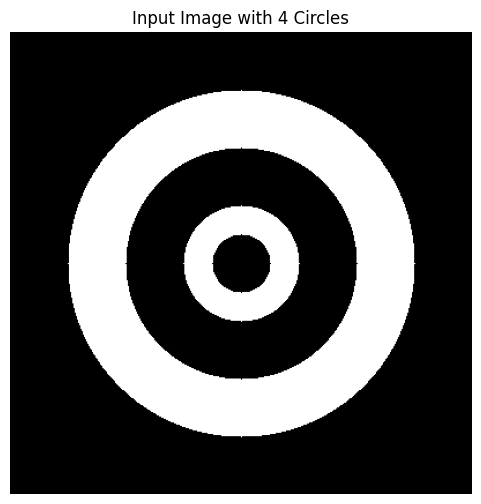

In [2]:
# Create a synthetic image with nested shapes (concentric circles)
image = np.zeros((400, 400), dtype=np.uint8)
cv2.circle(image, (200, 200), 150, 255, -1)  # Largest outer circle (filled)
cv2.circle(image, (200, 200), 100, 0, -1)    # Middle circle (hole)
cv2.circle(image, (200, 200), 50, 255, -1)   # Smallest inner circle (filled)
cv2.circle(image, (200, 200), 25, 0, -1)     # New innermost black circle

# Display the input image using matplotlib
plt.figure(figsize=(6, 6))
plt.imshow(image, cmap='gray')
plt.title('Input Image with 4 Circles')
plt.axis('off')
plt.show()

### cv2.RETR_EXTERNAL

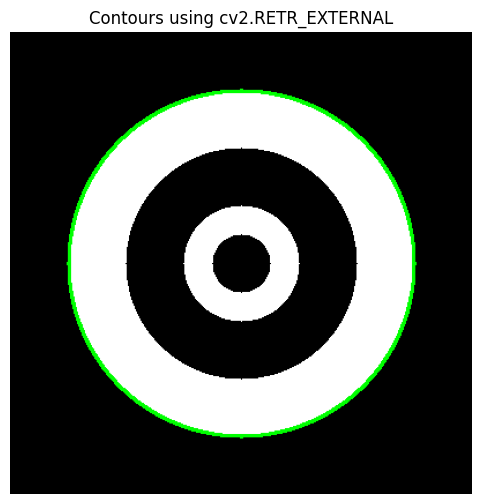

Hierarchy:
 [[[-1 -1 -1 -1]]]


In [ ]:
# Find contours using cv2.RETR_EXTERNAL
contours, hierarchy = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Convert image to color for visualization
image_color = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

# Draw the outer contours in green
cv2.drawContours(image_color, contours, -1, (0, 255, 0), 2)

# Display the result using matplotlib
plt.figure(figsize=(6, 6))
plt.imshow(image_color)
plt.title('Contours using cv2.RETR_EXTERNAL')
plt.axis('off')
plt.show()

print("Hierarchy:\n", hierarchy)

### cv2.RETR_LIST

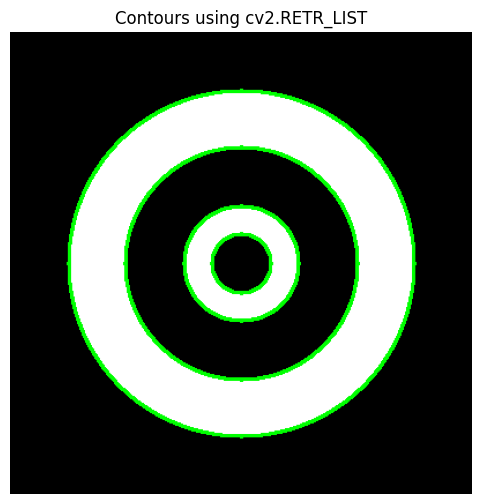

Hierarchy:
 [[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 3  1 -1 -1]
  [-1  2 -1 -1]]]


In [3]:
# Find contours using cv2.RETR_LIST
contours, hierarchy = cv2.findContours(image, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

# Convert image to color for visualization
image_color = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

# Draw all contours in green
cv2.drawContours(image_color, contours, -1, (0, 255, 0), 2)

# Display the result using matplotlib
plt.figure(figsize=(6, 6))
plt.imshow(image_color)
plt.title('Contours using cv2.RETR_LIST')
plt.axis('off')
plt.show()

print("Hierarchy:\n", hierarchy)

### cv2.RETR_CCOMP

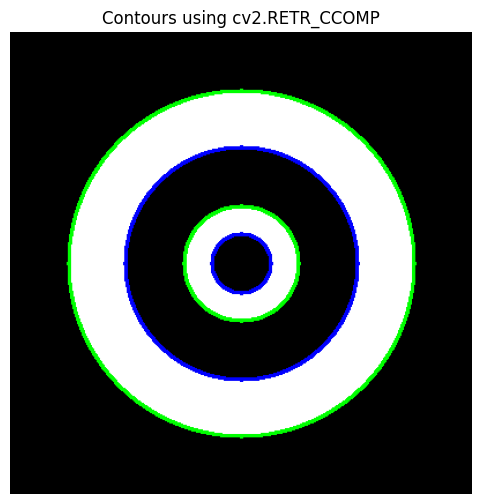

Hierarchy:
 [[[ 2 -1  1 -1]
  [-1 -1 -1  0]
  [-1  0  3 -1]
  [-1 -1 -1  2]]]


In [ ]:
# Find contours using cv2.RETR_CCOMP
contours, hierarchy = cv2.findContours(image, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)

# Convert image to color for visualization
image_color = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

# Draw contours based on the two-level hierarchy
for i, contour in enumerate(contours):
    if hierarchy[0][i][3] == -1:  # If it is an outer contour
        cv2.drawContours(image_color, [contour], -1, (0, 255, 0), 2)  # Green for outer contours

    else:  # If it is an inner contour (hole)
        cv2.drawContours(image_color, [contour], -1, (0, 0, 255), 2)  # Blue for inner contours


# Display the result using matplotlib
plt.figure(figsize=(6, 6))
plt.imshow(image_color)
plt.title('Contours using cv2.RETR_CCOMP')
plt.axis('off')
plt.show()

print("Hierarchy:\n", hierarchy)


### cv2.RETR_TREE

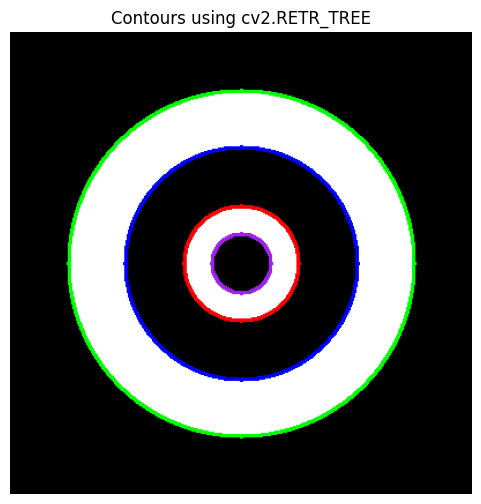

Hierarchy:
 [[[-1 -1  1 -1]
  [-1 -1  2  0]
  [-1 -1  3  1]
  [-1 -1 -1  2]]]


In [ ]:
# Find contours using cv2.RETR_TREE
contours, hierarchy = cv2.findContours(image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Convert image to color for visualization
image_color = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

# Draw contours based on hierarchy levels
for i, contour in enumerate(contours):
    level = 0
    # Traverse the hierarchy to determine the level of the contour
    parent = hierarchy[0][i][3]
    while parent != -1:
        level += 1
        parent = hierarchy[0][parent][3]

    # Use different colors for the first and second levels
    if level == 0:
        cv2.drawContours(image_color, [contour], -1, (0, 255, 0), 2)  # Green for first level (outermost)
    elif level == 1:
        cv2.drawContours(image_color, [contour], -1, (0, 0, 255), 2)  # Red for second level (inner)
    elif level == 2:
        cv2.drawContours(image_color, [contour], -1, (255, 0, 0), 2)  # Blue for third level
    else:
        cv2.drawContours(image_color, [contour], -1, (160, 32, 240), 2)  # Blue for third level

# Display the result using matplotlib
plt.figure(figsize=(6, 6))
plt.imshow(image_color)
plt.title('Contours using cv2.RETR_TREE')
plt.axis('off')
plt.show()

print("Hierarchy:\n", hierarchy)

## Comparision of all modes

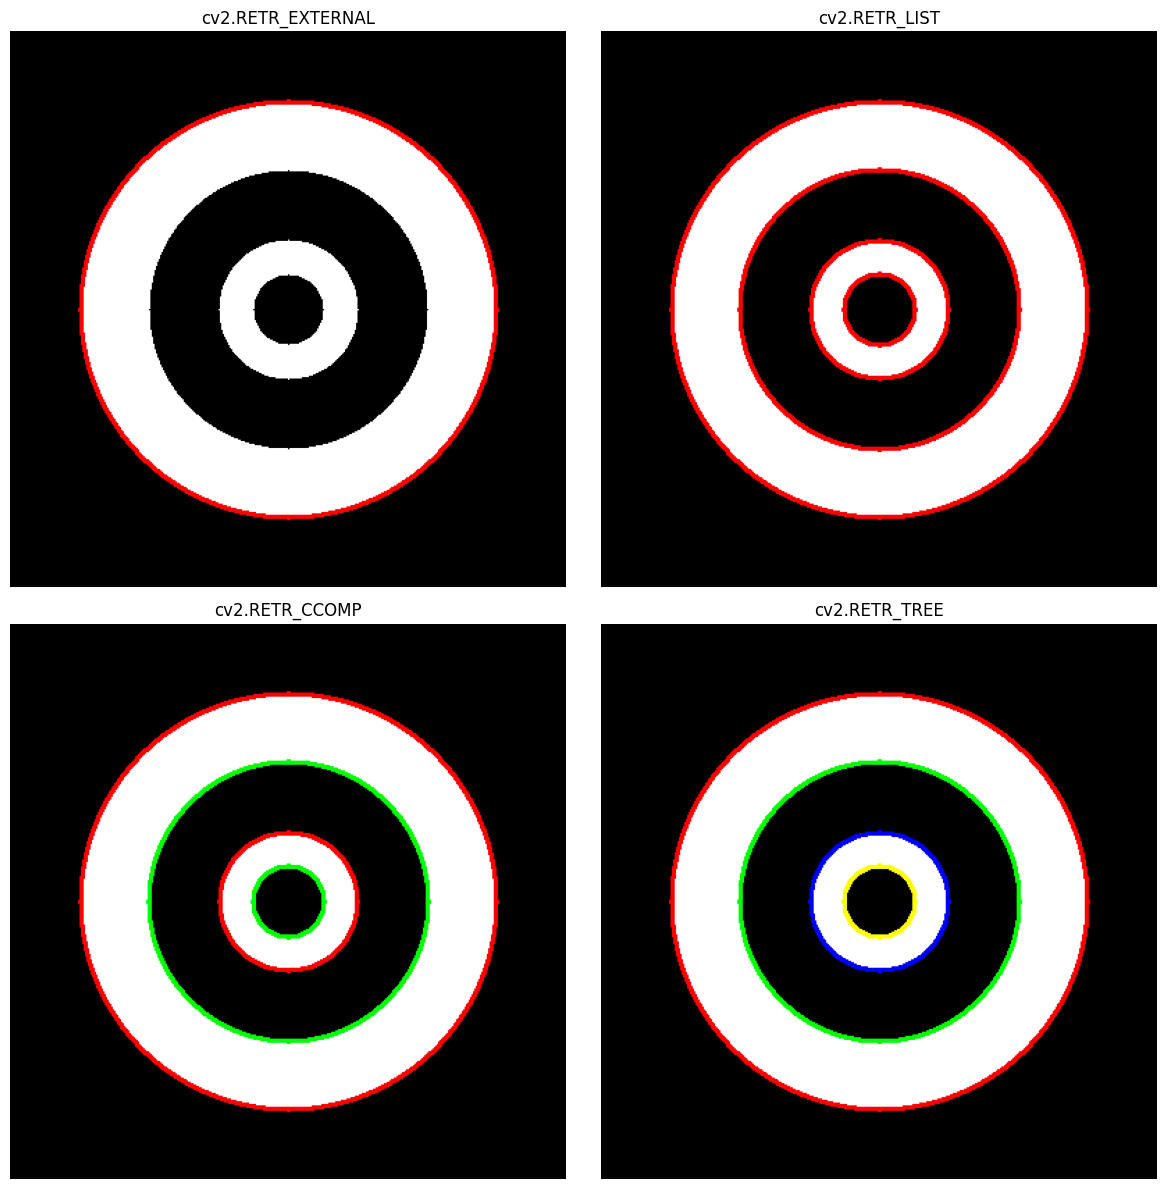

In [ ]:
# Define a function to draw contours with different colors based on hierarchy level
def draw_contours(image, mode, title):
    contours, hierarchy = cv2.findContours(image, mode, cv2.CHAIN_APPROX_SIMPLE)
    image_color = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

    # Colors for different hierarchy levels
    colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 255, 0), (0, 255, 255)]

    for i, contour in enumerate(contours):
        level = 0
        if hierarchy is not None:
            # Traverse the hierarchy to determine the level of the contour
            parent = hierarchy[0][i][3]
            while parent != -1:
                level += 1
                parent = hierarchy[0][parent][3]

        # Use different colors for different levels
        color = colors[level % len(colors)]  # Cycle through colors if levels exceed available colors
        cv2.drawContours(image_color, [contour], -1, color, 2)

    # Display the image
    plt.imshow(image_color)
    plt.title(title)
    plt.axis('off')

# Set up a figure for comparison
plt.figure(figsize=(12, 12))

# Visualize contours using each retrieval mode
plt.subplot(2, 2, 1)
draw_contours(image, cv2.RETR_EXTERNAL, 'cv2.RETR_EXTERNAL')

plt.subplot(2, 2, 2)
draw_contours(image, cv2.RETR_LIST, 'cv2.RETR_LIST')

plt.subplot(2, 2, 3)
draw_contours(image, cv2.RETR_CCOMP, 'cv2.RETR_CCOMP')

plt.subplot(2, 2, 4)
draw_contours(image, cv2.RETR_TREE, 'cv2.RETR_TREE')

plt.tight_layout()
plt.show()

## **Contour Approximation Method**

### cv2.CHAIN_APPROX_NONE

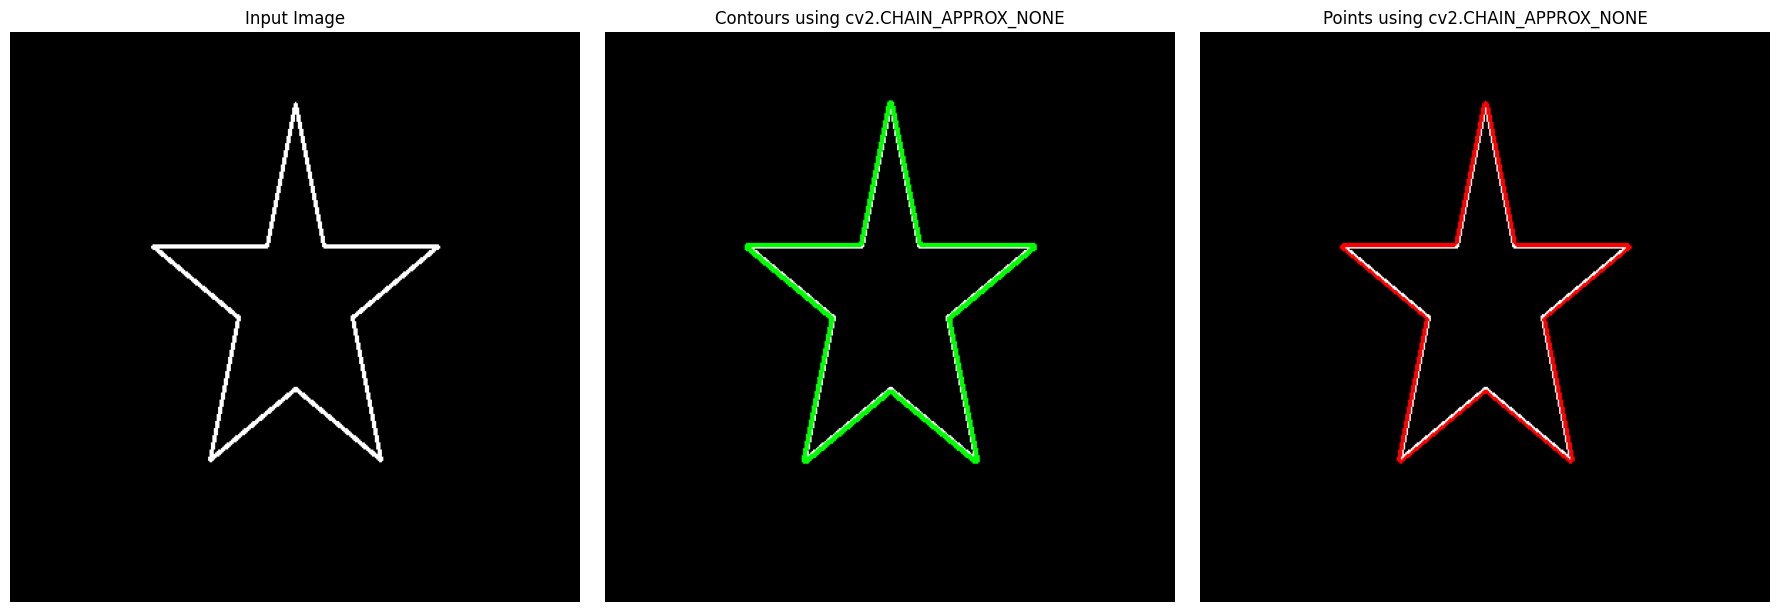

In [ ]:
# Create a synthetic image with an irregular shape (e.g., a star-like shape)
image = np.zeros((400, 400), dtype=np.uint8)

# Draw a star shape
pts = np.array([[200, 50], [220, 150], [300, 150], [240, 200], [260, 300],
                [200, 250], [140, 300], [160, 200], [100, 150], [180, 150]], np.int32)
pts = pts.reshape((-1, 1, 2))
cv2.polylines(image, [pts], isClosed=True, color=255, thickness=2)

# Find contours using cv2.CHAIN_APPROX_NONE
contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# Convert image to color for visualization
image_contour = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)  # Image for contours
image_points = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)   # Image for points

# Draw the contours in green on the contour image
for contour in contours:
    cv2.drawContours(image_contour, [contour], -1, (0, 255, 0), 2)  # Draw contours in green

# Draw the points in red on the points image
for contour in contours:
    for point in contour:
        cv2.circle(image_points, tuple(point[0]), 1, (255, 0, 0), -1)  # Red dots for points

# Plot the input image, contour-only image, and points-only image side by side
plt.figure(figsize=(18, 6))

# Display the input image
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Input Image')
plt.axis('off')

# Display the image with contours only
plt.subplot(1, 3, 2)
plt.imshow(image_contour)
plt.title('Contours using cv2.CHAIN_APPROX_NONE')
plt.axis('off')

# Display the image with points only
plt.subplot(1, 3, 3)
plt.imshow(image_points)
plt.title('Points using cv2.CHAIN_APPROX_NONE')
plt.axis('off')

plt.tight_layout()
plt.show()


### cv2.CHAIN_APPROX_SIMPLE

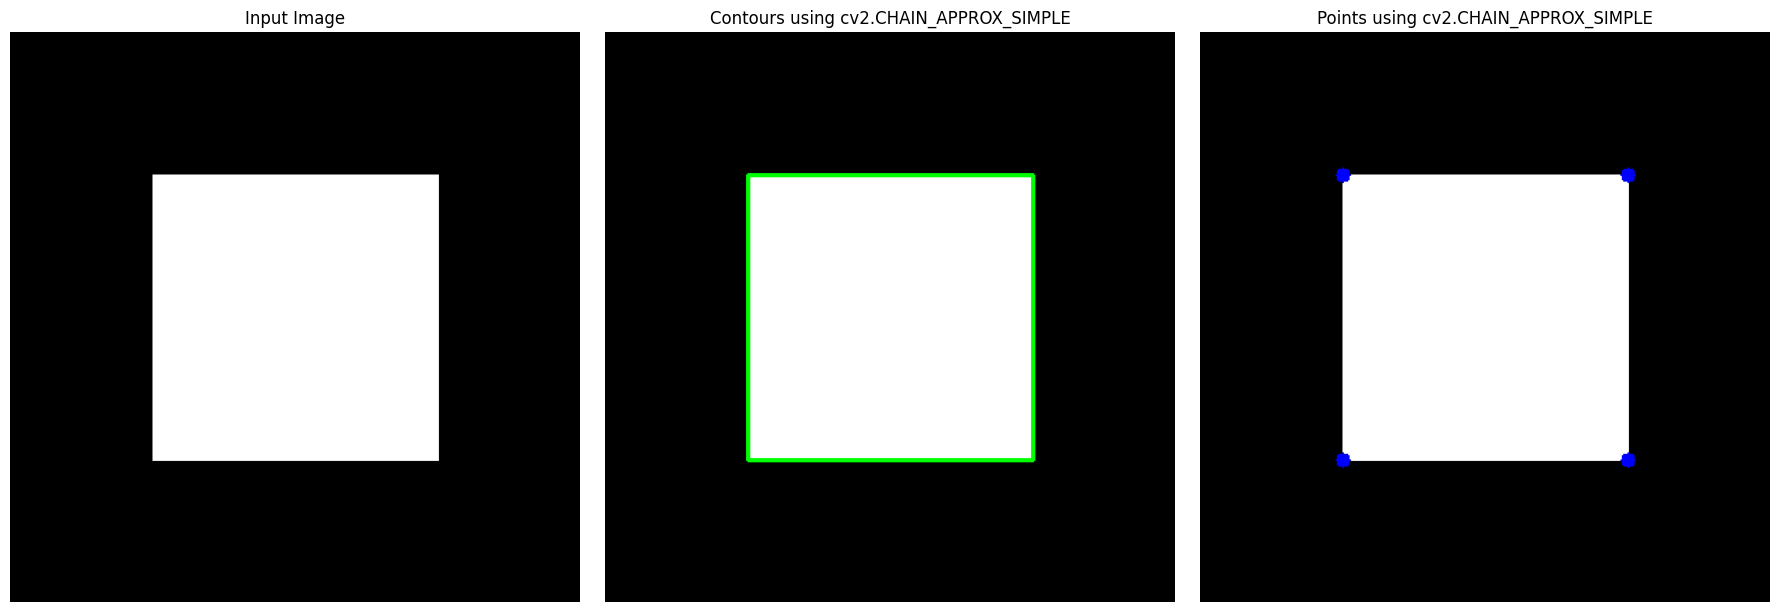

In [ ]:
# Create a synthetic image with a rectangle
image = np.zeros((400, 400), dtype=np.uint8)
cv2.rectangle(image, (100, 100), (300, 300), 255, -1)  # Draw a filled rectangle

# Find contours using cv2.CHAIN_APPROX_SIMPLE
contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Convert image to color for visualization
image_contours = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
image_keypoints = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

# Draw the simplified contours (keypoints only) on `image_contours`
for contour in contours:
    # Draw contours in green
    cv2.drawContours(image_contours, [contour], -1, (0, 255, 0), 2)

# Draw keypoints (points of the contour) on `image_keypoints`
for contour in contours:
    for point in contour:
        # Draw key points (red dots) for each contour
        cv2.circle(image_keypoints, tuple(point[0]), 5, (0, 0, 255), -1)

# Plot the input image, contours, and keypoints side by side
plt.figure(figsize=(18, 6))

# Display the input image
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Input Image')
plt.axis('off')

# Display the image with contours
plt.subplot(1, 3, 2)
plt.imshow(image_contours)
plt.title('Contours using cv2.CHAIN_APPROX_SIMPLE')
plt.axis('off')

# Display the image with keypoints
plt.subplot(1, 3, 3)
plt.imshow(image_keypoints)
plt.title('Points using cv2.CHAIN_APPROX_SIMPLE')
plt.axis('off')

plt.tight_layout()
plt.show()


### cv2.CHAIN_APPROX_TC89_L1

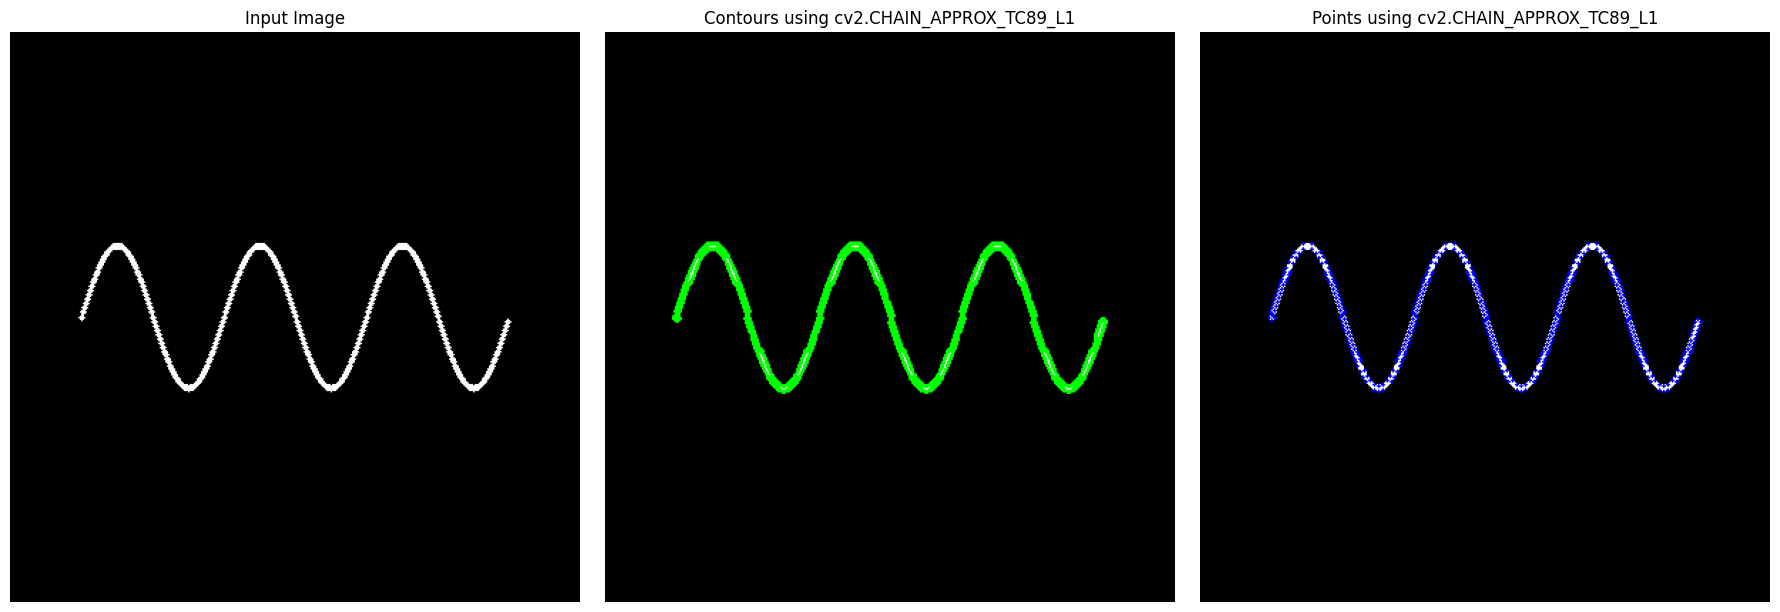

In [ ]:
# Create a synthetic image with a wavy contour (e.g., sinusoidal wave shape)
image = np.zeros((400, 400), dtype=np.uint8)

# Draw a wavy contour using a sinusoidal function
for x in range(50, 350):
    y = int(200 + 50 * np.sin(x * np.pi / 50))
    cv2.circle(image, (x, y), 2, 255, -1)

# Find contours using cv2.CHAIN_APPROX_TC89_KCOS
contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_TC89_L1)

# Convert the image to color for different visualizations
image_contour = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)  # Image for contours
image_points = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)   # Image for points

# Draw the contours on the contour image
for contour in contours:
    cv2.drawContours(image_contour, [contour], -1, (0, 255, 0), 2)  # Draw contours in green

# Draw the points on the points image
for contour in contours:
    for point in contour:
        cv2.circle(image_points, tuple(point[0]), 1, (0, 0, 255), -1)  # Red dots for key points

# Plot the input image, contour-only image, and points-only image side by side
plt.figure(figsize=(18, 6))

# Display the input image
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Input Image')
plt.axis('off')

# Display the image with contours only
plt.subplot(1, 3, 2)
plt.imshow(image_contour)
plt.title('Contours using cv2.CHAIN_APPROX_TC89_L1')
plt.axis('off')

# Display the image with points only
plt.subplot(1, 3, 3)
plt.imshow(image_points)
plt.title('Points using cv2.CHAIN_APPROX_TC89_L1')
plt.axis('off')

plt.tight_layout()
plt.show()

### cv2.CHAIN_APPROX_TC89_KCOS

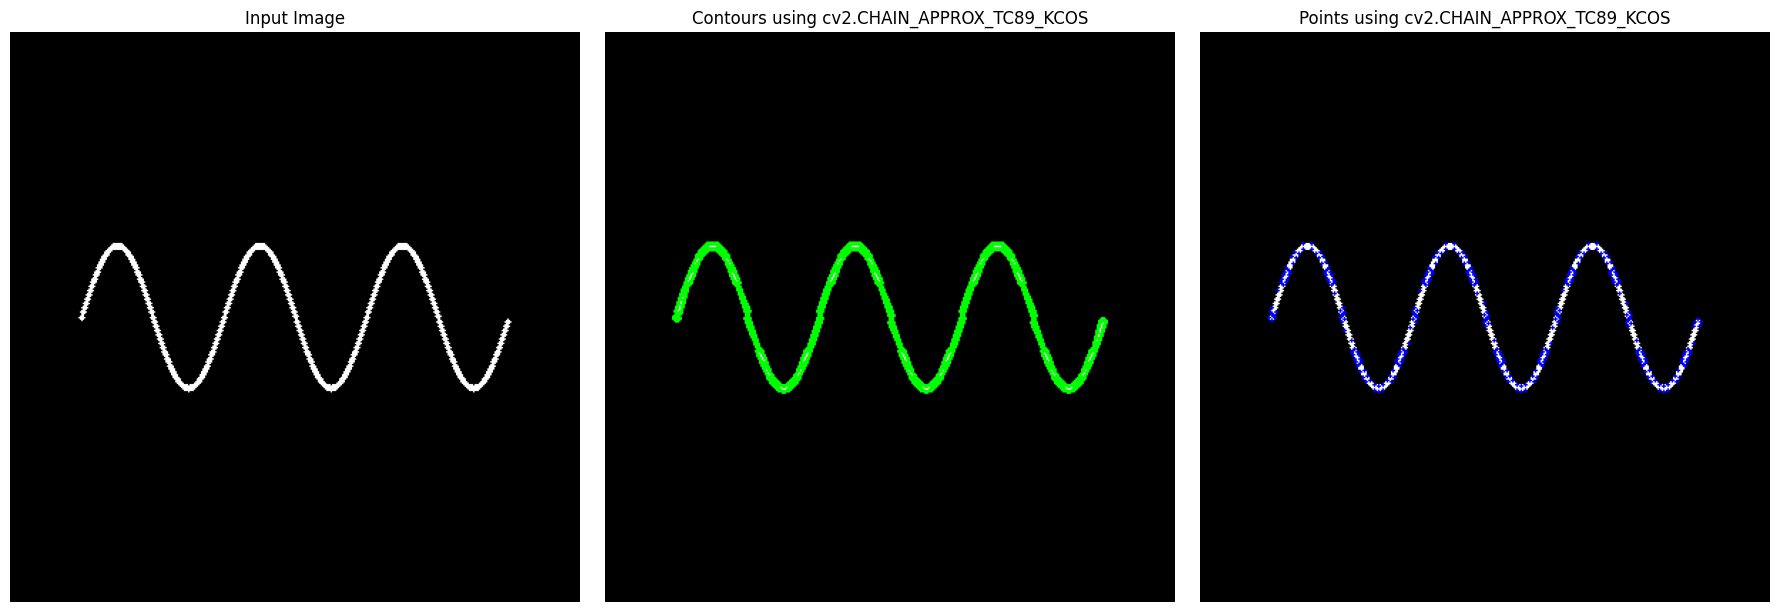

In [ ]:
# Create a synthetic image with a wavy contour (e.g., sinusoidal wave shape)
image = np.zeros((400, 400), dtype=np.uint8)

# Draw a wavy contour using a sinusoidal function
for x in range(50, 350):
    y = int(200 + 50 * np.sin(x * np.pi / 50))
    cv2.circle(image, (x, y), 2, 255, -1)

# Find contours using cv2.CHAIN_APPROX_TC89_KCOS
contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_TC89_KCOS)

# Convert the image to color for different visualizations
image_contour = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)  # Image for contours
image_points = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)   # Image for points

# Draw the contours on the contour image
for contour in contours:
    cv2.drawContours(image_contour, [contour], -1, (0, 255, 0), 2)  # Draw contours in green

# Draw the points on the points image
for contour in contours:
    for point in contour:
        cv2.circle(image_points, tuple(point[0]), 1, (0, 0, 255), -1)  # Red dots for key points

# Plot the input image, contour-only image, and points-only image side by side
plt.figure(figsize=(18, 6))

# Display the input image
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Input Image')
plt.axis('off')

# Display the image with contours only
plt.subplot(1, 3, 2)
plt.imshow(image_contour)
plt.title('Contours using cv2.CHAIN_APPROX_TC89_KCOS')
plt.axis('off')

# Display the image with points only
plt.subplot(1, 3, 3)
plt.imshow(image_points)
plt.title('Points using cv2.CHAIN_APPROX_TC89_KCOS')
plt.axis('off')

plt.tight_layout()
plt.show()
